# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56204.40
The current value of your 5.3 ETH is $20805.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-11-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2020-11-30 00:00:00-05:00  118.32  118.450  118.2500  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.7300  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.980  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.900  117.5133  117.580  4821820   
...                           ...      ...       ...      ...      ...   
2021-12-13 00:00:00-05:00  114.51  114.705  114.4600  114.600  4006984   
2021-12-14 00:00:00-05:00  114.46  114.540  114.2600  114.410  6247899   
2021-12-15 00:00:00-05:00  114.23  114.445  114.1100  114.300  7232824   
2021-12-16 00:00:00-05:00  114.26  114.480  114.2600  114.360  7124224   
2021-12-17 00:00:00-05:00  114.55  114.680  114.4700  114.510  7182764   

                              SPY                                       
                             open    high     low     close     volume  
time                                                                    
2020-11-30 00:00:00-05:00  362.83  363.12  359.17  362.0000   67154075  
2020-12-01 00:00:00-05:00  365.57  367.68  364.93  365.9700   64527332  
2020-12-02 00:00:00-05:00  364.82  366.96  364.20  366.7599   37323404  
2020-12-03 00:00:00-05:00  366.68  368.19  365.50  366.6698   52905586  
2020-12-04 00:00:00-05:00  367.32  369.85  367.22  369.8300   40264568  
...                           ...     ...     ...       ...        ...  
2021-12-13 00:00:00-05:00  470.19  470.56  466.27  466.6100   53533452  
2021-12-14 00:00:00-05:00  463.05  465.74  460.25  463.3900   84376354  
2021-12-15 00:00:00-05:00  463.42  470.86  460.74  470.5800   97945190  
2021-12-16 00:00:00-05:00  472.57  472.87  464.80  466.4300  100111230  
2021-12-17 00:00:00-05:00  461.52  464.74  458.06  459.8600  114433011  

[266 rows x 10 columns]

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.4
Current SPY closing price: $362.0


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18100.00
The current value of your 200 AGG shares is $23680.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data


# Create savings DataFrame
df_savings = pd.DataFrame([
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
],
    columns=["Amount"],
    index=["Crypto", "Shares"]
)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,77009.974
Shares,41780.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

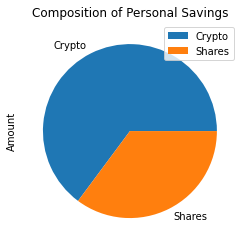

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["Amount"].sum()
total_amount
remaining_amount = emergency_fund - total_amount
# Validate saving health
if total_amount > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_amount == emergency_fund:
    print(f"! Your savings is equal to your emergency fund.")
else:
    print(f"Sorry! You don't have enough money in your emergency fund. You need {remaining_amount} to reach goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-30', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-12-08 00:00:00-05:00  108.18  108.2150  108.0500  108.14  2601556.0   
2016-12-09 00:00:00-05:00  108.08  108.1800  107.7200  107.83  3728544.0   
2016-12-12 00:00:00-05:00  107.70  107.8200  107.6100  107.74  2897640.0   
2016-12-13 00:00:00-05:00  107.87  107.9400  107.7101  107.86  3201106.0   
2016-12-14 00:00:00-05:00  108.07  108.1185  107.2900  107.30  3334950.0   

                              SPY                                        
                             open    high      low   close       volume  
time                                                                     
2016-12-08 00:00:00-05:00     NaN     NaN      NaN     NaN          NaN  
2016-12-09 00:00:00-05:00  225.41  226.50  225.370  226.49   59930498.0  
2016-12-12 00:00:00-05:00  226.40  226.96  225.760  226.22   61782330.0  
2016-12-13 00:00:00-05:00  227.01  228.34  227.000  227.71   69706966.0  
2016-12-14 00:00:00-05:00  227.41  228.23  225.365  225.92  103609913.0

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-12-08 00:00:00-05:00  108.18  108.2150  108.0500  108.14  2601556.0   
2016-12-09 00:00:00-05:00  108.08  108.1800  107.7200  107.83  3728544.0   
2016-12-12 00:00:00-05:00  107.70  107.8200  107.6100  107.74  2897640.0   
2016-12-13 00:00:00-05:00  107.87  107.9400  107.7101  107.86  3201106.0   
2016-12-14 00:00:00-05:00  108.07  108.1185  107.2900  107.30  3334950.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-12-08 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2016-12-09 00:00:00-05:00    -0.002867  225.41  226.50  225.370  226.49   
2016-12-12 00:00:00-05:00    -0.000835  226.40  226.96  225.760  226.22   
2016-12-13 00:00:00-05:00     0.001114  227.01  228.34  227.000  227.71   
2016-12-14 00:00:00-05:00    -0.005192  227.41  228.23  225.365  225.92   

                                                     
                                volume daily_return  
time                                                 
2016-12-08 00:00:00-05:00          NaN          NaN  
2016-12-09 00:00:00-05:00   59930498.0          NaN  
2016-12-12 00:00:00-05:00   61782330.0    -0.001192  
2016-12-13 00:00:00-05:00   69706966.0     0.006587  
2016-12-14 00:00:00-05:00  103609913.0    -0.007861

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001621,1.014038,0.996301,1.000256,1.014061,0.995667,0.998464,1.008942,0.993473,0.996600,...,1.001032,0.997533,0.990607,1.015735,0.991839,1.007647,0.987990,0.990137,1.000569,1.006933
2,1.003396,1.013519,0.987394,1.005350,1.019253,0.990547,0.997418,1.013822,0.997740,0.991928,...,1.016419,1.010277,0.997032,1.026142,0.990957,1.007569,0.984797,0.974484,0.984674,1.003169
3,1.000975,1.004967,0.995939,1.007626,1.017125,0.996188,1.001318,1.014591,0.984958,1.003962,...,1.023239,1.006629,0.993620,1.022949,0.990728,1.017166,0.997642,0.974684,0.986191,1.005001
4,1.014033,1.001951,0.992894,1.027252,1.017451,0.998412,0.996850,1.015060,0.994837,0.993756,...,1.015029,1.005987,1.007290,1.017339,0.992136,1.030749,1.014260,0.978431,0.978887,1.002804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.714409,10.165773,20.214373,3.695160,11.726553,8.164438,8.160595,4.477182,30.514252,4.477187,...,10.012479,19.519243,3.007429,5.689183,4.656150,20.709115,27.057384,1.430391,51.554507,21.485269
7557,13.630818,10.460935,20.254872,3.642606,11.934473,8.186009,8.194122,4.533572,30.292979,4.484810,...,10.110533,19.517976,3.000185,5.750221,4.710806,20.791295,27.026132,1.432007,50.875041,21.478755
7558,13.595308,10.552253,20.245377,3.624068,11.966187,8.169434,8.171755,4.569439,30.543833,4.507233,...,10.052290,19.610233,3.026466,5.718235,4.725130,20.553339,26.962862,1.414458,50.663122,21.648064
7559,13.440508,10.613152,20.108820,3.689482,11.913725,8.223915,8.193277,4.542086,30.472696,4.505369,...,9.929436,19.677309,3.029879,5.758223,4.737288,20.533179,27.154564,1.419826,50.752931,21.635800


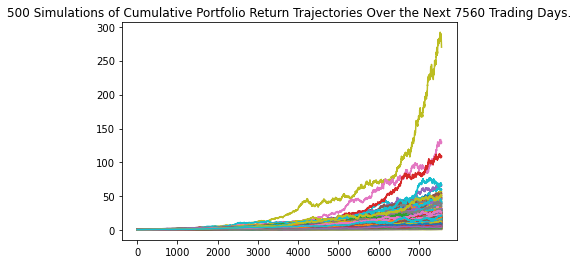

In [25]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

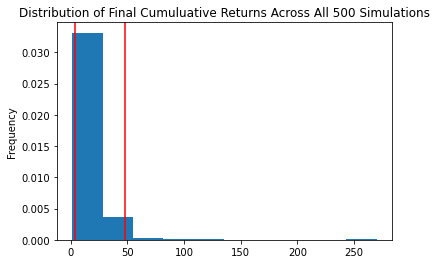

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             16.612306
std              16.821456
min               1.302047
25%               8.268807
50%              13.223510
75%              20.499971
max             269.878266
95% CI Lower      3.543321
95% CI Upper     48.244960
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70866.42 and $964899.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106299.62 and $1447348.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992591,1.001146,0.991198,1.001496,1.002351,1.001242,0.993869,0.981593,1.007780,0.995205,...,0.999397,1.003015,1.003299,0.993409,0.992413,0.994205,1.007501,1.001047,1.008356,1.012744
2,0.981716,0.995743,0.993013,1.006981,0.989261,1.000858,0.983153,0.990481,1.002504,0.989519,...,1.002193,1.006464,1.003458,0.984167,0.993986,1.003473,1.007483,1.002719,1.001389,1.013704
3,0.976271,0.996175,0.990318,1.009902,0.992708,0.989162,0.982241,0.987597,1.011258,0.985813,...,0.993486,1.005688,1.006988,0.992976,0.995512,0.998470,1.011912,0.995449,1.010049,1.014307
4,0.968341,0.983993,0.986286,1.006282,0.990473,0.989914,0.977770,0.986670,1.003527,0.987520,...,1.002186,0.999402,0.994117,1.009968,0.998161,0.995951,1.012753,1.006239,1.004768,1.022434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.163801,2.247121,2.080966,1.409528,1.872741,1.582498,2.111557,2.020762,1.465863,1.025589,...,1.576319,1.772682,1.118593,1.442495,1.589300,1.254005,1.697834,2.928083,1.702962,0.984971
1257,1.183375,2.253244,2.087728,1.410430,1.865781,1.575912,2.148232,2.019618,1.458700,1.027009,...,1.566656,1.786678,1.118774,1.447130,1.584922,1.260488,1.718498,2.938207,1.717761,0.982805
1258,1.186901,2.270564,2.093300,1.411545,1.853381,1.579285,2.155901,2.052309,1.458082,1.016737,...,1.572365,1.755140,1.112952,1.451357,1.580485,1.241044,1.738694,2.944738,1.741892,0.964585
1259,1.181744,2.249503,2.069579,1.399402,1.874290,1.579367,2.148693,2.061283,1.443505,1.030181,...,1.590884,1.757941,1.118110,1.459618,1.563402,1.244806,1.744560,2.950971,1.756263,0.964572


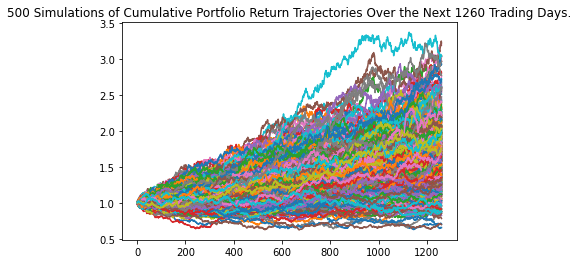

In [32]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

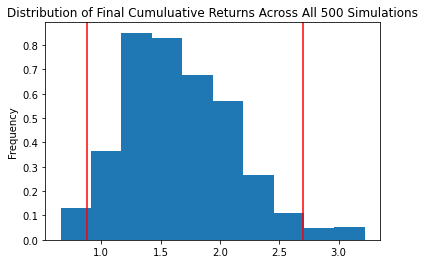

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl_5

count           500.000000
mean              1.664257
std               0.462015
min               0.656735
25%               1.338682
50%               1.603496
75%               1.966531
max               3.220383
95% CI Lower      0.882208
95% CI Upper      2.703237
Name: 1260, dtype: float64

In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $212599.25 and $2894697.61


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011437,1.002103,0.999249,0.988086,1.014131,1.011317,0.981224,0.996826,0.995039,0.995584,...,0.994704,0.991013,1.008528,1.008206,1.013716,1.011436,0.978995,0.999592,0.998732,0.984649
2,1.014195,0.994403,0.998741,0.996345,1.004044,1.021771,0.984751,0.992691,0.999768,0.992826,...,0.991321,0.985838,1.004928,0.995378,1.017249,0.998309,0.983221,0.995464,1.000714,0.982546
3,1.001777,0.996859,0.989130,0.994075,0.994333,1.035912,0.984019,0.991306,0.991052,0.991637,...,0.995738,0.988264,1.009825,0.998600,1.021594,0.984408,0.985148,0.979187,1.009655,0.987573
4,0.991376,1.006216,0.993627,0.985917,1.011813,1.021661,0.970916,0.979234,0.983996,0.982868,...,1.005632,0.998517,1.005325,0.998493,1.024898,0.986515,0.988148,0.967738,1.014842,0.976605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.538905,3.165377,2.147683,1.567958,2.336774,1.853601,3.376195,1.507211,3.324529,2.531336,...,2.561807,2.197923,4.259856,1.800547,2.169969,3.575428,2.195795,1.495419,2.317815,1.243371
2517,1.541390,3.197552,2.167221,1.576526,2.336352,1.861397,3.353850,1.485871,3.377785,2.543911,...,2.559911,2.217204,4.228187,1.814850,2.210593,3.543213,2.195086,1.492731,2.301029,1.244297
2518,1.552493,3.199301,2.160960,1.589305,2.358187,1.854032,3.340700,1.476489,3.407152,2.556810,...,2.559101,2.213928,4.223571,1.824679,2.214253,3.550698,2.202615,1.505496,2.250443,1.246724
2519,1.572145,3.249019,2.175939,1.607555,2.373104,1.864031,3.334294,1.459256,3.430452,2.540770,...,2.543994,2.198455,4.267823,1.804206,2.218604,3.594961,2.199419,1.485562,2.219602,1.231233


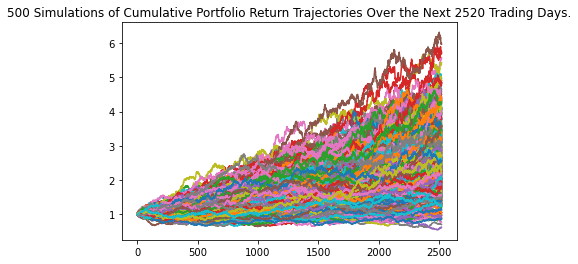

In [38]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

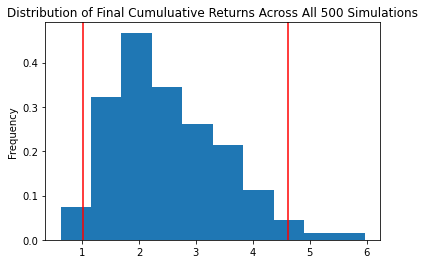

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
tbl_10

count           500.000000
mean              2.495462
std               0.957144
min               0.621120
25%               1.797286
50%               2.292697
75%               3.134994
max               5.968802
95% CI Lower      1.014705
95% CI Upper      4.621454
Name: 2520, dtype: float64

In [41]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $212599.25 and $2894697.61
